In [ ]:
# !pip install 'gym[box2d]'
# !apt-get install python-opengl -y
# !apt install xvfb -y
# !pip install pyvirtualdisplay
# !pip install https://github.com/pyglet/pyglet/archive/pyglet-1.5-maintenance.zip
# !apt-get install ffmpeg -y

In [2]:
# env.render() gives error in Colab
# below code solves display error
# https://github.com/openai/gym/issues/1898


from pyvirtualdisplay import Display
display = Display(visible=0,size=(600,600))
display.start()

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from maze_env import Maze
from utils import plot_policy, plot_action_values, test_agent

In [5]:
env = Maze()

In [6]:
action_values = np.zeros((5, 5, 4))

In [7]:
def target_policy(state):
    av = action_values[state]
    return np.random.choice(np.flatnonzero(av == av.max()))

In [8]:
def exploratory_policy(state):
    return np.random.randint(4)

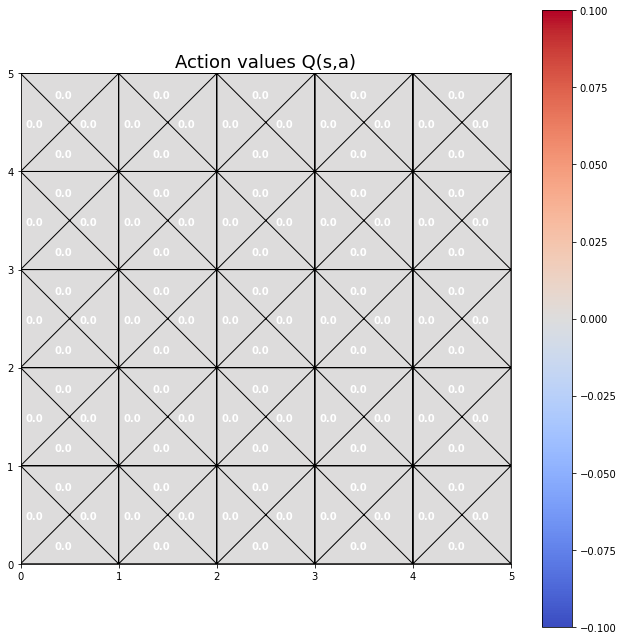

In [9]:
plot_action_values(action_values)

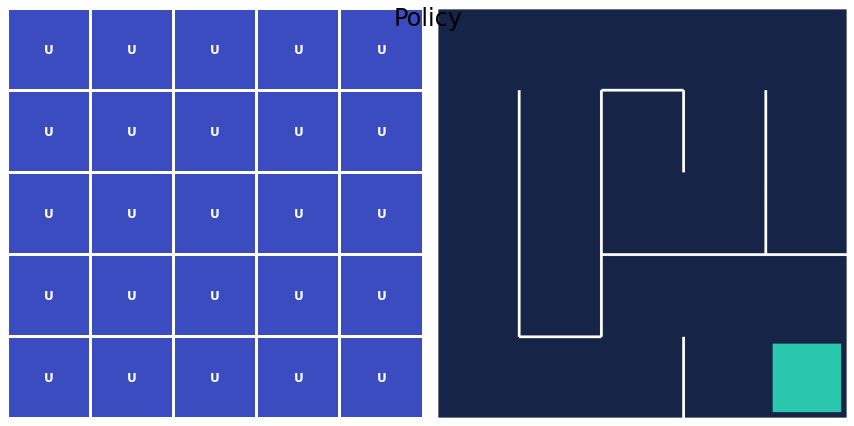

In [10]:
plot_policy(action_values, env.render(mode='rgb_array'))

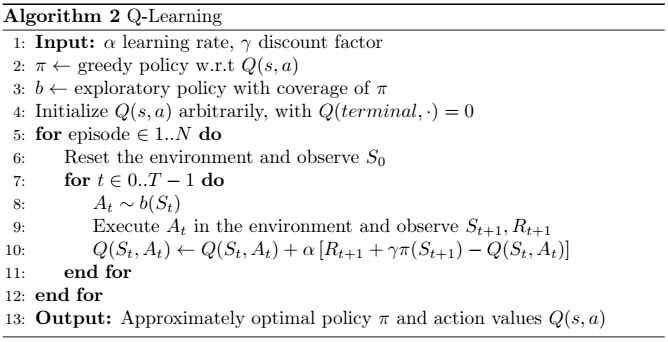

In [11]:
def q_learning(action_values, exploratory_policy, target_policy, episodes, alpha=0.1, gamma=0.99):
    
    for episode in range(1, episodes + 1):
        state = env.reset()
        done = False
        
        while not done:
            action = exploratory_policy(state)
            next_state, reward, done, _ = env.step(action)
            next_action = target_policy(next_state)
            
            qsa = action_values[state][action]
            next_qsa = action_values[next_state][next_action]
            action_values[state][action] = qsa + alpha * (reward + gamma * next_qsa - qsa)
    
            state = next_state

In [12]:
q_learning(action_values, exploratory_policy, target_policy, 1000)

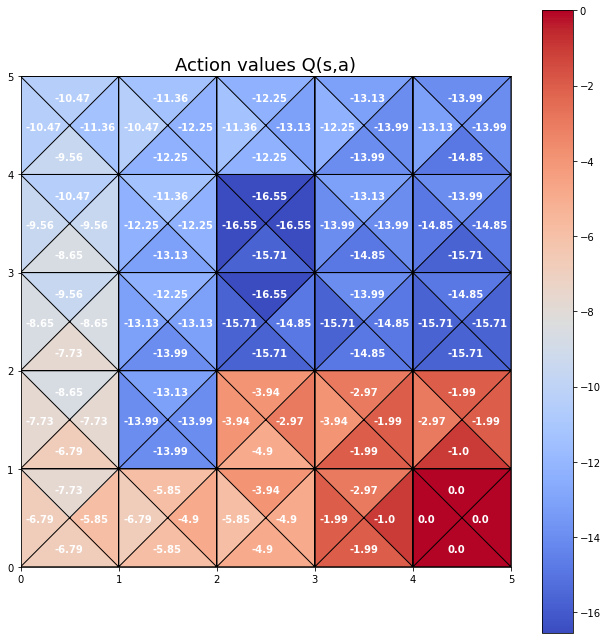

In [13]:
plot_action_values(action_values)

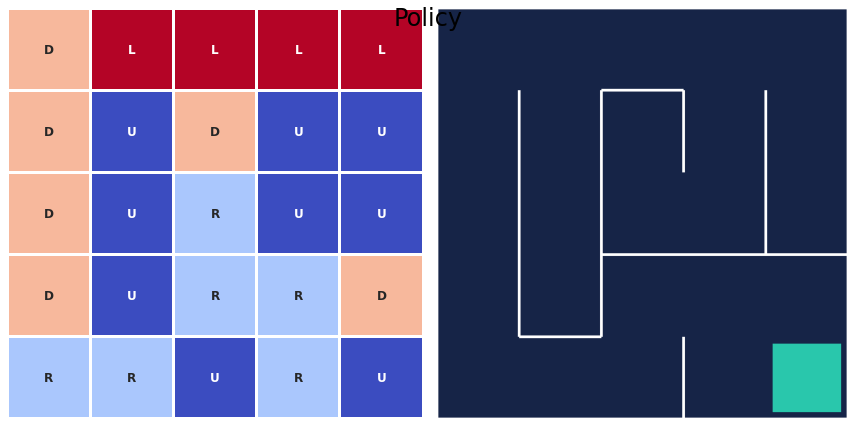

In [14]:
plot_policy(action_values, env.render(mode='rgb_array'))

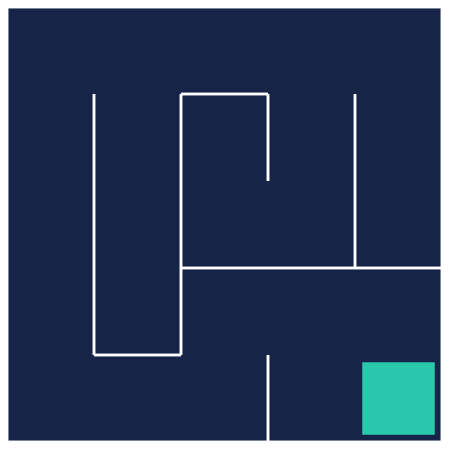

In [16]:
test_agent(env,target_policy, episodes=1)